# IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as scipy
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split                   
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# IMPORTING DATASET

In [2]:
##Reading dataset using pd.read_csv()

Cloth_Price = pd.read_csv("clothes_price_prediction_data.csv")

# EXPLORATORY DATA ANALYSIS

In [3]:
##Displayingb the the first 5 rows of our dataset
Cloth_Price.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [4]:
##Summary statistics of our dataset
Cloth_Price.describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


The maximum price is 199.00 while the minimum is 10.00

In [5]:
#Displaying information of our dataset using .info() fuction
Cloth_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [6]:
Cloth_Price.size

6000

The dataset is of size 6000

In [7]:
Cloth_Price.shape

(1000, 6)

The dataset has 1000 rows and 6 columns

In [8]:
Cloth_Price.columns

Index(['Brand', 'Category', 'Color', 'Size', 'Material', 'Price'], dtype='object')

In [9]:
#Displaying number of unique values in Clothe price dataset
for i in Cloth_Price.columns:
    print(f' {i} has {Cloth_Price[i].nunique()} unique values')

 Brand has 6 unique values
 Category has 6 unique values
 Color has 6 unique values
 Size has 6 unique values
 Material has 6 unique values
 Price has 190 unique values


In [10]:
#Categorical variables in Housing Data
Categorical_Columns = Cloth_Price.select_dtypes(['object'])
print(f' The dataset Contains {len(Categorical_Columns.columns.tolist())} categorical columns')

 The dataset Contains 5 categorical columns


In [11]:
for i in Categorical_Columns.columns:
    print(i)

Brand
Category
Color
Size
Material


In [12]:
for i in Categorical_Columns.columns:
    print(f' The unique values in {i} are {Cloth_Price[i].unique()}')

 The unique values in Brand are ['New Balance' 'Under Armour' 'Nike' 'Adidas' 'Reebok' 'Puma']
 The unique values in Category are ['Dress' 'Jeans' 'Shoes' 'Sweater' 'Jacket' 'T-shirt']
 The unique values in Color are ['White' 'Black' 'Red' 'Green' 'Yellow' 'Blue']
 The unique values in Size are ['XS' 'M' 'XL' 'XXL' 'S' 'L']
 The unique values in Material are ['Nylon' 'Silk' 'Wool' 'Cotton' 'Polyester' 'Denim']


In [13]:
##Summary statistics for categorical values
Cloth_Price.describe(include = ['object']).T

,count,unique,top,freq
Brand,1000,6,Under Armour,179
Category,1000,6,Jacket,191
Color,1000,6,Yellow,173
Size,1000,6,XS,196
Material,1000,6,Polyester,175


In [14]:
#Diplaying numerical varibales in dataset
Numerical_Columns = Cloth_Price.select_dtypes('int64', 'float64')
print(f' The dataset contains {len(Numerical_Columns.columns.tolist())} numerical columns')

 The dataset contains 1 numerical columns


In [15]:
for i in Numerical_Columns.columns:
    print(i)

Price


# DATA CLEANING 

In [16]:
Cloth_Price.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

The dataset contains no null values

In [17]:
Cloth_Price.duplicated().any()

np.False_

The data set has no duplicate variables

## Price Analysis

The prices of clothes are fairly normally distributed.

<Figure size 640x480 with 0 Axes>

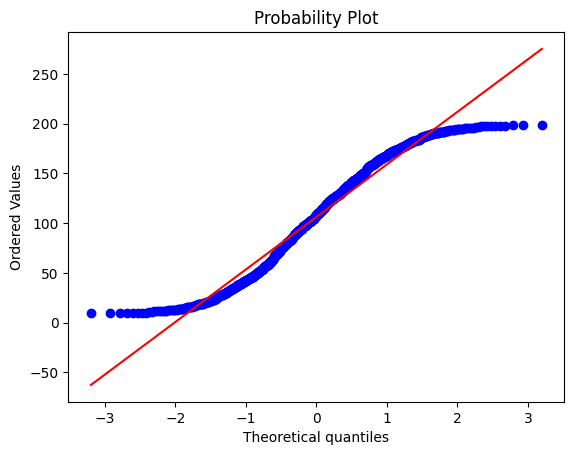

<Figure size 640x480 with 0 Axes>

In [18]:
scipy.stats.probplot(Cloth_Price.Price, plot = plt)
plt.figure()

It is clear from the plot that the price of clothes is equally distributed accross brand, categeory, size, and material.

In [19]:
Cloth_Price.Price.describe()

count    1000.000000
mean      106.289000
std        53.695444
min        10.000000
25%        59.750000
50%       108.000000
75%       150.000000
max       199.000000
Name: Price, dtype: float64

# DATA PREPARATION

In [20]:
#Encoding Categorical Variables
encoder = OrdinalEncoder()
Cloth_Price[['Brand','Category','Color','Size','Material']] = encoder.fit_transform(Cloth_Price[['Brand','Category','Color','Size','Material']])

In [21]:
Cloth_Price.head()

,Brand,Category,Color,Size,Material,Price
0,1.0,0.0,4.0,4.0,2.0,182
1,1.0,2.0,0.0,4.0,4.0,57
2,5.0,0.0,3.0,1.0,5.0,127
3,2.0,3.0,2.0,1.0,0.0,77
4,0.0,4.0,4.0,1.0,2.0,113


In [22]:
x = Cloth_Price.drop(['Price'], axis = 1)
y = Cloth_Price.Price

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


# MODELING

In [23]:
#Split dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

In [24]:
#Lets see the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 5)
(250, 5)
(750,)
(250,)
